<a href="https://colab.research.google.com/github/JoanWaweru/IS2Project/blob/main/SafaricomProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading Dataset 

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read csv file into a pandas dataframe
from google.colab import files
uploaded = files.upload()

Saving safaricomDataset.csv to safaricomDataset.csv


In [4]:
df = pd.read_csv('safaricomDataset.csv')
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...
1,1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...
2,2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...
3,3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...
4,4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')

In [6]:
df.shape

(5000, 4)

In [7]:
tweets_df = df[["Date", "User", "Tweet"]]
tweets_df.head()

,Date,User,Tweet
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...


In [8]:
from sklearn import utils
tweets_df.shape

(5000, 3)

Preprocessing and Cleaning of the Dataset 

In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.1 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=8940643bbc9b3de369ea08b1242e8c199c22878fb307a1eaade8067407c67990
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [12]:
import re
import emoji
def tokenize_tweets(text):
  #remove emojis
  text = emoji.demojize(text)
  #remove urls
  text = re.sub('http[s]?://\S+', '', text)
  #remove punctuations
  text = re.sub(r'[^\w\s]','',text)
  #strip numbers
  text = re.sub('[0-9]+', '', text)
  text = word_tokenize(text)
  
  return text
tweets_df["Tweets"] = tweets_df["Tweet"].apply(lambda x: tokenize_tweets(x))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")
tweets_df["stop_words"] = tweets_df["Tweets"].apply(lambda x: [w for w in x if w in stop])
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [w.lower() for w in x if w not in stop])

tweets_df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Date,User,Tweet,Tweets,stop_words
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambake, why, isnt, someone, tagging, safar...",[]
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_care, whats, happening, network, my...","[with, your, are, or]"
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_care, sakongayub, safaricomplc, saf...","[do, do]"
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_care, sakongayub, safaricomplc, saf...","[its, my, i]"
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_care, safaricomplc, safaricom_care,...","[how, can, i, a, of]"
5,2022-10-21 22:45:24+00:00,GeneralMeaking,@Safaricom_Care huyu si ni wife material? htt...,"[safaricom_care, huyu, si, ni, wife, material]",[]
6,2022-10-21 22:33:15+00:00,DrescoD_r,@omwambaKE @Uber_Support @Safaricom_Care @NPSC_KE,"[omwambake, uber_support, safaricom_care, npsc...",[]
7,2022-10-21 22:29:48+00:00,eugeneogaro,@Safaricom_Care @Morara__ @dcijuja 🤣🤣🤣eeeh ngorii,"[safaricom_care, morara__, dcijuja, rolling_on...",[]
8,2022-10-21 22:09:11+00:00,antho_ke_,"Hey @Safaricom_Care ,mniite dear na mniambie g...","[hey, safaricom_care, mniite, dear, na, mniamb...",[]
9,2022-10-21 22:05:23+00:00,Safaricom_Care,@luyknlevi1 Hey. We have taken this up with ou...,"[luyknlevi, hey, we, taken, fraud, team, pleas...","[have, this, up, with, our, such, to, our]"


In [13]:
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambake, why, isnt, someone, tagging, safar...",[]
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_care, whats, happening, network, my...","[with, your, are, or]"
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_care, sakongayub, safaricomplc, saf...","[do, do]"
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_care, sakongayub, safaricomplc, saf...","[its, my, i]"
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_care, safaricomplc, safaricom_care,...","[how, can, i, a, of]"


In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [stemmer.stem(w) for w in x])
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambak, whi, isnt, someon, tag, safaricom_car]",[]
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_car, what, happen, network, my, net...","[with, your, are, or]"
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[do, do]"
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[its, my, i]"
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_car, safaricomplc, safaricom_car, l...","[how, can, i, a, of]"


In [16]:
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  
  
  return text
tweets_df['tweet_punct'] = tweets_df['Tweets'].apply(lambda x: remove_punct(x))

In [17]:
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambak, whi, isnt, someon, tag, safaricom_car]",[],omwambak whi isnt someon tag safaricom_car
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_car, what, happen, network, my, net...","[with, your, are, or]",safaricom_car what happen network my network b...
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[do, do]",safaricom_car sakongayub safaricomplc safarico...
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[its, my, i]",safaricom_car sakongayub safaricomplc safarico...
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_car, safaricomplc, safaricom_car, l...","[how, can, i, a, of]",safaricom_car safaricomplc safaricom_car like ...


Data Visualization(Word Cloud)

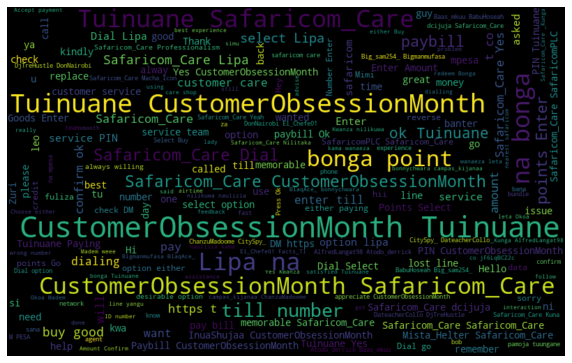

In [18]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Get the most frequent words

In [19]:
from collections import Counter

cnt = Counter()
for text in df["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('@Safaricom_Care', 4756),
 ('#Tuinuane', 2819),
 ('#CustomerObsessionMonth', 2706),
 ('the', 1548),
 ('to', 1272),
 ('na', 1234),
 ('and', 1210),
 ('*126#', 1135),
 ('bonga', 892),
 ('I', 885),
 ('or', 761),
 ('number', 749),
 ('points', 729),
 ('till', 692),
 ('Dial', 527),
 ('option', 519),
 ('Lipa', 515),
 ('my', 512),
 ('you', 493),
 ('then', 493)]

Using Vader Library to analyse sentiments in Text

In [20]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.0 MB/s 


Training of Dataset

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Getting the sentiments label

In [22]:
def sentiment_score_compound(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

def sentiment_score_pos(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['pos']

def sentiment_score_neg(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neg']

def sentiment_score_neu(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neu']
tweets_df["tweets_sent_compound"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_compound(x))
tweets_df["tweets_sent_pos"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_pos(x))
tweets_df["tweets_sent_neg"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_neg(x))
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambak, whi, isnt, someon, tag, safaricom_car]",[],omwambak whi isnt someon tag safaricom_car,0.0000,0.000,0.000
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_car, what, happen, network, my, net...","[with, your, are, or]",safaricom_car what happen network my network b...,-0.2960,0.000,0.115
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[do, do]",safaricom_car sakongayub safaricomplc safarico...,0.0000,0.000,0.000
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[its, my, i]",safaricom_car sakongayub safaricomplc safarico...,0.3182,0.078,0.000
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_car, safaricomplc, safaricom_car, l...","[how, can, i, a, of]",safaricom_car safaricomplc safaricom_car like ...,0.6249,0.281,0.128


In [23]:
tweets_df.tail()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg
4995,2022-10-20 11:23:16+00:00,Davey_GOAT,Najua hupendi motivation but amini nili anza h...,"[najua, hupendi, motiv, amini, nili, anza, hii...","[but, you]",najua hupendi motiv amini nili anza hii bank y...,0.9756,0.426,0.162
4996,2022-10-20 11:23:12+00:00,Jackieabilla,@Safaricom_Care 😒😒😒,"[safaricom_car, unamused_faceunamused_faceunam...",[],safaricom_car unamused_faceunamused_faceunamus...,0.0000,0.000,0.000
4997,2022-10-20 11:22:11+00:00,Safaricom_Care,"@samwelogor : Hello, We've responded to you vi...","[samwelogor, hello, weve, respond, via, dmplea...","[to, you]",samwelogor hello weve respond via dmpleas checkkc,0.0000,0.000,0.000
4998,2022-10-20 11:21:59+00:00,Safaricom_Care,"@MutwazK Hi Kimz, This should be the person cl...","[mutwazk, hi, kimz, thi, person, closest, fami...","[should, be, the, to, you, in, your]",mutwazk hi kimz thi person closest familyrn,0.0000,0.000,0.000
4999,2022-10-20 11:21:42+00:00,Safaricom_Care,"@Muru_b Good afternoon Badri, sorry about that...","[muru_b, good, afternoon, badri, sorri, could,...","[about, that, be, a, in, a, and, if, it, your,...",muru_b good afternoon badri sorri could handse...,0.4939,0.138,0.033


In [24]:
import nltk
wordlist = nltk.FreqDist(all_words)
word_features = wordlist.keys()

Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_list = []
for tweet in tweets_df["tweet_punct"]:
  
  tweets_list.append(tweet)
len(tweets_list)
tfIdf = TfidfVectorizer(max_features=20000)

In [26]:
X = tweets_df["tweet_punct"]

vec = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2))
len(all_words)

557040

Define Label

In [27]:
def label_value(val):
  if val < 0:
    return 0
  elif val == 0:
    return 1
  else:
    return 2
tweets_df["label"] = tweets_df["tweets_sent_compound"].apply(lambda x: label_value(x))
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,label
0,2022-10-21 23:34:52+00:00,Dj_Fesky,@omwambaKE Why isnt someone tagging @Safaricom...,"[omwambak, whi, isnt, someon, tag, safaricom_car]",[],omwambak whi isnt someon tag safaricom_car,0.0000,0.000,0.000,1
1,2022-10-21 23:13:33+00:00,byramlejah,@Safaricom_Care what's happening with your net...,"[safaricom_car, what, happen, network, my, net...","[with, your, are, or]",safaricom_car what happen network my network b...,-0.2960,0.000,0.115,0
2,2022-10-21 22:59:27+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[do, do]",safaricom_car sakongayub safaricomplc safarico...,0.0000,0.000,0.000,1
3,2022-10-21 22:57:36+00:00,arpha046,@Safaricom_Care @SakongAyub @SafaricomPLC @Saf...,"[safaricom_car, sakongayub, safaricomplc, safa...","[its, my, i]",safaricom_car sakongayub safaricomplc safarico...,0.3182,0.078,0.000,2
4,2022-10-21 22:52:34+00:00,arpha046,@Safaricom_Care @SafaricomPLC @Safaricom_Care ...,"[safaricom_car, safaricomplc, safaricom_car, l...","[how, can, i, a, of]",safaricom_car safaricomplc safaricom_car like ...,0.6249,0.281,0.128,2


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(tweets_list)
X = cv.transform(tweets_list)
y = tweets_df["label"].values

Classification using SVM

In [29]:
#encoder = preprocessing.LabelEncoder()
#X = tfIdf.fit_transform(df['Text'])
#y = df['tweets_sent_compound']
#X.shape         

In [30]:
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
#encoder = preprocessing.LabelEncoder()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)

In [36]:
from sklearn.svm import LinearSVC
#epochs = 20
#for epoch in range(epochs):
#  print(f'Epochs: {epoch + 1}')
#  train_loss = 0
#  valid_loss = 0
train_f1 = X_train[:,0]
train_f2 = X_train[:,1]

#train_f1 = train_f1.reshape(X_train,[2,2,5])
#train_f2 = train_f2.reshape(X_train,[2,2,5])

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

#for epoch in range(epochs):
  #print(f'Epochs: {epoch + 1}')
  #train_loss = 0
  #valid_loss = 0
epochs = 1
alpha = 0.0001

while(epochs < 10000):
  y = w1 * train_f1 + w2 * train_f2
  prod = y * y_train
  print(epochs)
  count = 0
  for val in prod:
    if(val >= 1):
      cost = 0
      w1 = w1 - alpha * (2 * 1/epochs * w1)
      w2 = w2 - alpha * (2 * 1/epochs * w2)
            
    else:
      cost = 1 - val 
      w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
      w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
      count += 1
  epochs += 1 
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(tweets_list)
X = ngram_vectorizer.transform(tweets_list)
y = tweets_df["label"].values
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)
svm = LinearSVC()
svm.fit(X_train, y_train)


ValueError: ignored

In [ ]:
#clf = LinearSVC()
#clf.fit(X_train, y_train)

In [ ]:
pred = svm.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

TF-IDF Vectroization

In [ ]:
train_f3 = X_train[:,0]
train_f4 = X_train[:,1]

train_f3 = train_f3.reshape(90,1)
train_f4 = train_f4.reshape(90,1)

w3 = np.zeros((90,1))
w4 = np.zeros((90,1))

#for epoch in range(epochs):
  #print(f'Epochs: {epoch + 1}')
  #train_loss = 0
  #valid_loss = 0
while(epochs < 10000):
    y = w3 * train_f3 + w4 * train_f4
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w3 = w3 - alpha * (2 * 1/epochs * w3)
            w4 = w4 - alpha * (2 * 1/epochs * w4)
            
        else:
            cost = 1 - val 
            w3 = w3 + alpha * (train_f3[count] * y_train[count] - 2 * 1/epochs * w3)
            w4 = w4 + alpha * (train_f4[count] * y_train[count] - 2 * 1/epochs * w4)
        count += 1
    epochs += 1  
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(tweets_list)
X = tfidf_vectorizer.transform(tweets_list)
y = tweets_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))